<a href="https://colab.research.google.com/github/KulsoomA20/DLRL_Umme_Kulsoom_A/blob/main/DRL/DeepRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Reward (R) Matrix 
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100. 100.]]

Training Standard Q-Agent (Epsilon-Greedy) 
Most efficient path (from state 0):
[0, 1, 3, 9, 10]


/tmp/ipython-input-3693572359.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action = available_actions_list[int(np.random.choice(best_indices, size=1))]
/tmp/ipython-input-3693572359.py:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q_max_index = int(np.random.choice(q_max_index, size = 1))
/tmp/ipython-input-3693572359.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q_max_index = int(q_max_index)
/tmp/ipython-input-3693572359.py:146: DeprecationWarn

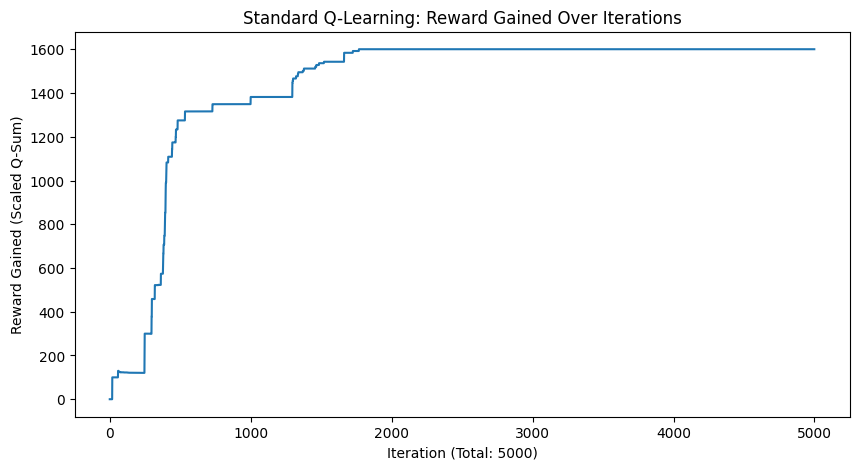

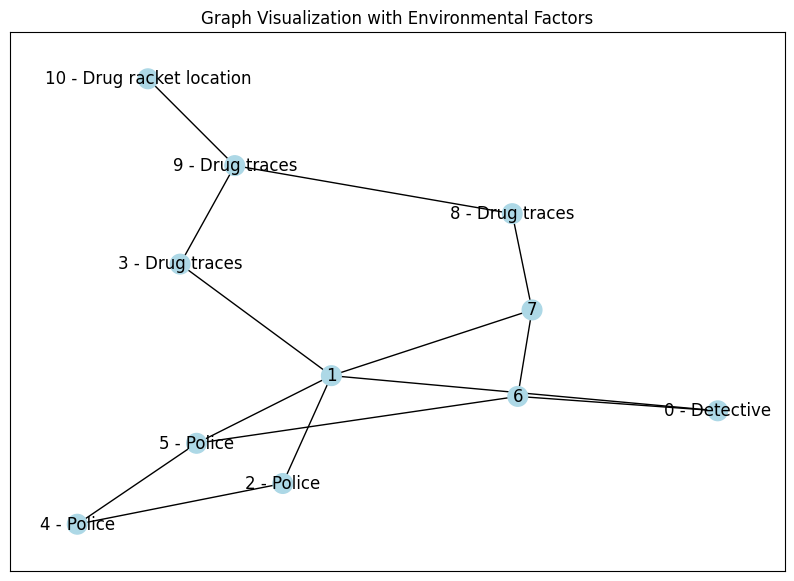


--- Training Q-Agent with Environmental Avoidance ---


/tmp/ipython-input-3693572359.py:204: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q_max_index = int(np.random.choice(q_max_index, size = 1))
/tmp/ipython-input-3693572359.py:206: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q_max_index = int(q_max_index)



Police Found (Visits)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 303.   0.   0. 178.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]

Drug traces Found (Visits)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 396.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 429.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0

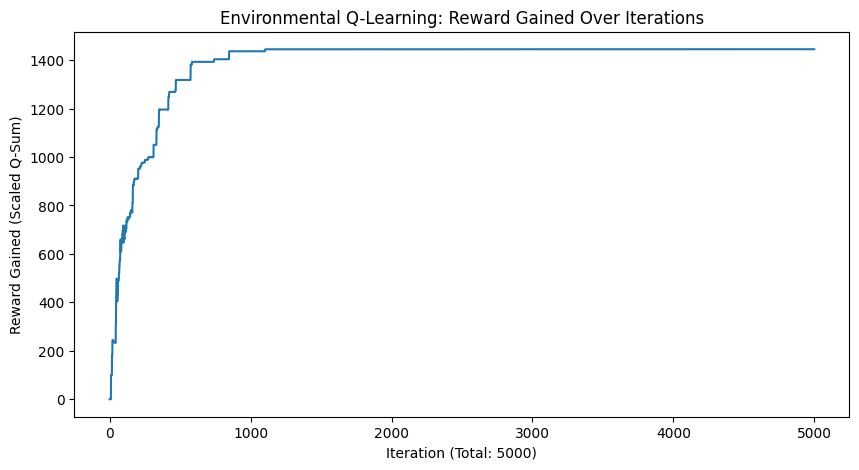


Most efficient path (Environmental Agent, from state 0):
[0, 1, 3, 9, 10]


In [3]:
"""
Deep Reinforcement Learning: Q-Learning with Environmental Awareness

This script implements Q-Learning to find the most efficient path (highest reward)
from state 0 to state 10 in a defined graph. It then extends the model to include
environmental awareness (avoiding 'Police' and seeking 'Drug traces').

Modifications:
1. Fixed undefined variable bugs and unnecessary code duplication.
2. Implemented an Epsilon-Greedy policy for better exploration/exploitation balance.
3. Added clearer structure and separation between Q-Learning components.
"""

import numpy as np
import pylab as pl
import networkx as nx
import random
import shutil

GAMMA = 0.8
EPSILON = 0.85
MATRIX_SIZE = 11
GOAL_STATE = 10
ITERATIONS = 5000

# Define Graph Edges
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
         (8, 9), (7, 8), (1, 7), (3, 9)]

# Define Environmental Factors
police = [2, 4, 5]
drug_traces = [3, 8, 9]

#REWARD (R) MATRIX
R = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

for point in edges:
    # Set reward to 0 for all valid edges
    R[point] = 0
    R[point[::-1]] = 0 # Ensure bidirectional path is 0

# Set reward for reaching the goal state (10)
for i in range(MATRIX_SIZE):
    if i != GOAL_STATE and R[i, GOAL_STATE] != -1:
        R[i, GOAL_STATE] = 100
        R[GOAL_STATE, i] = 100
R[GOAL_STATE, GOAL_STATE] = 100

print("Initial Reward (R) Matrix ")
print(R)

#Q-MATRIX AND ENVIRONMENT MATRICES
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

#  CORE RL UTILITY FUNCTION

def available_actions(state):
    """Determines the available actions (paths with R >= 0) for a given state."""
    current_state_row = R[state, ]
    available_action_indices = np.where(current_state_row >= 0)[1]
    return available_action_indices.tolist()

def choose_action(state, available_actions_list):
    """Epsilon-Greedy policy for action selection."""
    if not available_actions_list:
        return -1

    if np.random.random() < EPSILON:
        q_row_for_actions = Q[state, available_actions_list]
        max_q = np.max(q_row_for_actions)
        best_indices = np.where(q_row_for_actions == max_q)[1]
        action = available_actions_list[int(np.random.choice(best_indices, size=1))]
    else:
        action = random.choice(available_actions_list)

    return action

def update(current_state, action, gamma, R_matrix=R):
    """Updates the Q-Matrix using the Bellman equation."""

    # Find the maximum Q-value for the next state (action)
    q_max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]

    # Handle multiple max values randomly
    if q_max_index.shape[0] > 1:
        q_max_index = int(np.random.choice(q_max_index, size = 1))
    else:
        q_max_index = int(q_max_index)

    max_value = Q[action, q_max_index]

    #  Update Q-value
    Q[current_state, action] = R_matrix[current_state, action] + gamma * max_value

    # Return the score
    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q) * 100))
    else:
        return 0


# TRAINING FUNCTION

def train_agent(iterations):
    scores = []

    # Use random starting state for better exploration
    for _ in range(iterations):
        current_state = random.randint(0, MATRIX_SIZE - 1)

        available_action_list = available_actions(current_state)

        # Use epsilon-greedy to choose the action
        action = choose_action(current_state, available_action_list)

        if action != -1:
            score = update(current_state, action, GAMMA)
            scores.append(score)

    return scores

# EXECUTE TRAINING (Standard Q-Learning)
print("\nTraining Standard Q-Agent (Epsilon-Greedy) ")
scores_standard = train_agent(ITERATIONS)


# TESTING

def test_path(start_state):
    """Reconstructs the most efficient path found by the Q-matrix."""
    current_state = start_state
    steps = [current_state]

    while current_state != GOAL_STATE:
        # Choose the action with the maximum Q-value
        next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]

        # Handle multiple max Q-values randomly
        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size = 1))
        else:
            next_step_index = int(next_step_index)

        # Transition to the next state
        steps.append(next_step_index)
        current_state = next_step_index

        # Safety break for infinite loops in untrained agents
        if len(steps) > MATRIX_SIZE * 2:
            print("Warning: Max steps exceeded. Path might be incorrect.")
            break

    return steps

print("Most efficient path (from state 0):")
print(test_path(0))

pl.figure(figsize=(10, 5))
pl.plot(scores_standard)
pl.title('Standard Q-Learning: Reward Gained Over Iterations')
pl.xlabel(f'Iteration (Total: {ITERATIONS})')
pl.ylabel('Reward Gained (Scaled Q-Sum)')
pl.show()

# Q-LEARNING WITH ENVIRONMENTAL AWARENESS

# ENVIRONMENT SETUP AND VISUALIZATION
G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces',
           4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'8 - Drug traces',
           9:'9 - Drug traces', 10:'10 - Drug racket location'}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)

pl.figure(figsize=(10, 7))
nx.draw_networkx_nodes(H, pos, node_size = [200]*MATRIX_SIZE, node_color='lightblue')
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.title("Graph Visualization with Environmental Factors")
pl.show()


def collect_environmental_data(action):
    """Collects environmental data at the chosen state (action)."""
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
        found.append('d')
    return (found)

def update_with_env(current_state, action, gamma, R_matrix=R):
    """Updates Q-Matrix and updates environmental history matrices."""

    # 1. Update Q-value (same as standard update)
    q_max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if q_max_index.shape[0] > 1:
        q_max_index = int(np.random.choice(q_max_index, size = 1))
    else:
        q_max_index = int(q_max_index)
    max_value = Q[action, q_max_index]
    Q[current_state, action] = R_matrix[current_state, action] + gamma * max_value

    # 2. Update environmental history
    environment = collect_environmental_data(action)
    if 'p' in environment:
        env_police[current_state, action] += 1
    if 'd' in environment:
        env_drugs[current_state, action] += 1

    # Return the score
    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return 0


def available_actions_with_env_help(state):
    """Determines available actions, favoring paths with less police visits."""
    available_action_list = available_actions(state)

    if not available_action_list:
        return []

    police_history_for_actions = env_police[state, available_action_list]

    non_police_paths_indices = np.where(np.array(police_history_for_actions)[0] == 0)[0]

    if len(non_police_paths_indices) > 0:
        # Filter available actions to only include paths with zero police encounters
        temp_av_action = [available_action_list[i] for i in non_police_paths_indices]
        return temp_av_action

    # If all paths have police encounters, return the original list
    return available_action_list


# TRAINING (Environmental Awareness)
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

print("\n--- Training Q-Agent with Environmental Avoidance ---")
scores_env = []

for _ in range(ITERATIONS):
    current_state = random.randint(0, MATRIX_SIZE - 1)

    # Use environment-aware action filter
    available_action_list = available_actions_with_env_help(current_state)

    # Use epsilon-greedy on the filtered list
    action = choose_action(current_state, available_action_list)

    if action != -1:
        score = update_with_env(current_state, action, GAMMA)
        scores_env.append(score)

# Print environmental matrices
print('\nPolice Found (Visits)')
print(env_police)
print('')
print('Drug traces Found (Visits)')
print(env_drugs)


# PLOT ENVIRONMENTAL Q-LEARNING RESULTS
pl.figure(figsize=(10, 5))
pl.plot(scores_env)
pl.title('Environmental Q-Learning: Reward Gained Over Iterations')
pl.xlabel(f'Iteration (Total: {ITERATIONS})')
pl.ylabel('Reward Gained (Scaled Q-Sum)')
pl.show()

print("\nMost efficient path (Environmental Agent, from state 0):")
print(test_path(0))